In [1]:
import os
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#### parameters
result_path = '/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/'
version = 3
model_formats = [
    'alexnet_rotate_continuous_0-360_1_1_discrete_0',
    'alexnet_rotate_continuous_0-360_50_1_discrete_0',
    'alexnet_rotate_continuous_0-360_100_1_discrete_0',
    'alexnet_rotate_continuous_0-360_150_1_discrete_0',
    'alexnet_rotate_continuous_0-360_200_1_discrete_0',
    'alexnet_rotate_continuous_0-360_250_1_discrete_0',
    'alexnet_rotate_continuous_0-360_300_1_discrete_0',
    'alexnet_rotate_continuous_0-360_350_1_discrete_0',
    'alexnet_rotate_continuous_0-360_388_1_discrete_0',

    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_1_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_50_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_100_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_150_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_200_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_250_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_300_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_350_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_388_1_discrete_0',

    'alexnet_rotate_discrete_0-90_1_1_discrete_0',
    'alexnet_rotate_discrete_0-90_50_1_discrete_0',
    'alexnet_rotate_discrete_0-90_100_1_discrete_0',
    'alexnet_rotate_discrete_0-90_150_1_discrete_0',
    'alexnet_rotate_discrete_0-90_200_1_discrete_0',
    'alexnet_rotate_discrete_0-90_250_1_discrete_0',
    'alexnet_rotate_discrete_0-90_300_1_discrete_0',
    'alexnet_rotate_discrete_0-90_350_1_discrete_0',
    'alexnet_rotate_discrete_0-90_388_1_discrete_0',

    'alexnet_rotate_continuous_0-360_1_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_50_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_100_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_150_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_200_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_250_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_300_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_350_1_continuous_0-1',
    'alexnet_rotate_continuous_0-360_388_1_continuous_0-1',
]
file_name = 'analysis_v3_accuracy_by_rotate.pickle'

num_categories = 388
category_orders = [i for i in range(num_categories)]
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]

In [3]:
params = [0, 45, 90, 135, 180, 225, 270, 315] # rotate
acc_within = numpy.zeros((len(model_formats), len(params)))
acc_across = numpy.zeros((len(model_formats), len(params)))

for i, model_format in enumerate(model_formats):
    mf = model_format.split('_')

    model_name = mf[0]
    transformation_type = mf[1]
    transformation_sampling = mf[2]
    transformation_levels = list(map(float, mf[3].split('-')))
    # num_categories_transformed = int(mf[4])
    trial = int(mf[5])
    if len(mf) > 6:
        background_sampling = mf[6]
        background_colors = list(map(float, mf[7].split('-')))

    random.seed(trial) # seed fixed
    random.shuffle(category_orders)

    with open(os.path.join(result_path, 'v{}'.format(version), model_format, file_name), 'rb') as f:
        data = pickle.load(f)
    acc_within[i,:] = data['accuracy1_within']
    acc_across[i,:] = data['accuracy1_across']

(0.0, 1.0)

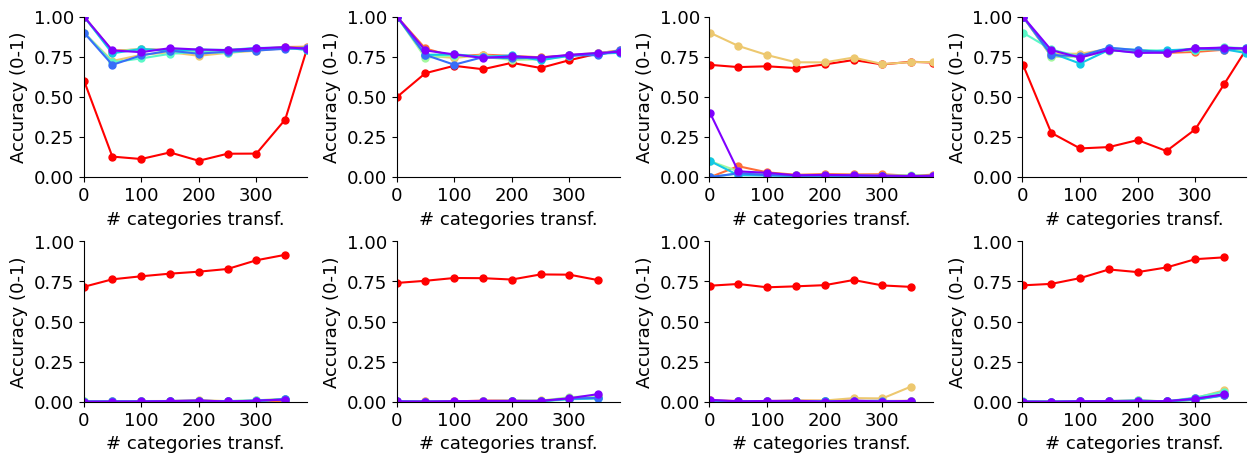

In [4]:
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '13'
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
colors = numpy.flipud(cm.rainbow(numpy.linspace(0, 1, len(params))))
margin = 0.4

#### visualize
plt.subplot(2,4, 1)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[0:9,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 5)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[0:8,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 2)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[9:18,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 6)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[9:17,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 3)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[18:27,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 7)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[18:26,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 4)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[27:36,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)

plt.subplot(2,4, 8)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[27:35,i], '.-', markersize=10, color=colors[i])
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)